In [1]:
# Type of language used in the project expressed as 1, 2 or 3. The value “1” corresponds to
# “Basic Cobol”, where the value “2” corresponds to “Advanced Cobol” and the value “3”
# to 4GL language

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import seaborn as sns
from scipy import stats

import sklearn
sklearn.__version__

'0.24.2'

In [3]:
data = pd.read_csv('./dataset.csv')

In [4]:
data



,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,77,4,4,85,12,1400,229,169,398,39,414,3
77,78,78,4,3,83,12,2800,227,73,300,34,297,1
78,79,79,4,4,82,24,9520,395,193,588,40,617,1
79,80,80,4,3,86,12,5880,469,176,645,43,697,3


In [5]:
data.describe()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,41.000000,2.185185,2.530864,85.740741,11.666667,5046.308642,182.123457,122.333333,304.456790,27.629630,289.234568,1.555556
std,23.526581,23.526581,1.415195,1.643825,1.222475,7.424621,4418.767228,144.035098,84.882124,180.210159,10.591795,185.761088,0.707107
min,1.000000,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,21.000000,21.000000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,41.000000,41.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,61.000000,61.000000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,81.000000,81.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


In [6]:
data.corr()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
id,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
Project,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
TeamExp,-0.006007,-0.006007,1.000000,0.424687,-0.210335,0.143948,0.119529,0.103768,0.256608,0.203805,0.235629,0.222884,-0.079112
ManagerExp,0.214294,0.214294,0.424687,1.000000,-0.011519,0.211324,0.158303,0.138146,0.206644,0.207748,-0.066821,0.187399,0.205521
YearEnd,0.096486,0.096486,-0.210335,-0.011519,1.000000,-0.095027,-0.048367,0.034331,0.001686,0.028234,-0.056743,0.012106,0.342233
Length,0.255187,0.255187,0.143948,0.211324,-0.095027,1.000000,0.693280,0.620711,0.483504,0.723849,0.266086,0.714092,-0.023810
Effort,0.126153,0.126153,0.119529,0.158303,-0.048367,0.693280,1.000000,0.581881,0.510328,0.705449,0.463865,0.738271,-0.261942
Transactions,0.265891,0.265891,0.103768,0.138146,0.034331,0.620711,0.581881,1.000000,0.185041,0.886419,0.341906,0.880923,0.136778
Entities,0.028787,0.028787,0.256608,0.206644,0.001686,0.483504,0.510328,0.185041,1.000000,0.618913,0.234747,0.598401,-0.056439
PointsNonAdjust,0.226076,0.226076,0.203805,0.207748,0.028234,0.723849,0.705449,0.886419,0.618913,1.000000,0.383842,0.985945,0.082737


<AxesSubplot:title={'center':"Pearson's Feature Correlation Heatmap"}>

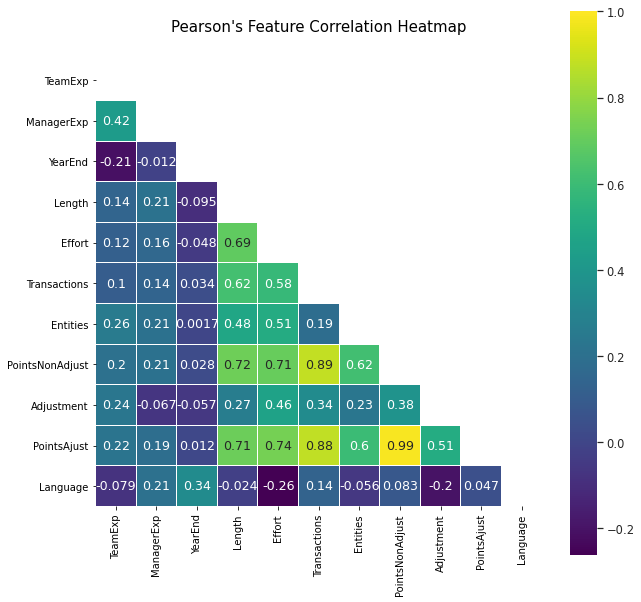

In [7]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
df = data.drop(['id', 'Project'], axis=1)
corr = df.astype(float).corr()
plt.title('Pearson\'s Feature Correlation Heatmap', y=1.05, size=15)
sns.set(font_scale=1.05)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,linewidths=0.1,mask=mask,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif.round(1)
# id	Project	TeamExp	ManagerExp	YearEnd	Length	Effort	Transactions	Entities	PointsNonAdjust	Adjustment	PointsAjust	Language

/home/arabialhumsi/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,5.0,TeamExp
1,5.0,ManagerExp
2,49.8,YearEnd
3,8.8,Length
4,8.2,Effort
5,inf,Transactions
6,inf,Entities
7,inf,PointsNonAdjust
8,43.2,Adjustment
9,592.3,PointsAjust


In [9]:
# entities and transactions destroy the r2 measure


# X_first = df.loc[:, (df.columns != 'Effort') & (df.columns != 'id') & (df.columns != 'Project')]
X_first = df[['PointsAjust', 'Adjustment', 'Length', 'ManagerExp', 'TeamExp', 'Language']]

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
X_first.shape


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_first.values, i) for i in range(X_first.shape[1])]
vif["features"] = X_first.columns
vif.round(1)


,VIF Factor,features
0,8.9,PointsAjust
1,7.1,Adjustment
2,6.9,Length
3,4.7,ManagerExp
4,4.6,TeamExp
5,4.1,Language


In [10]:
Y_first = df.loc[:, df.columns == 'Effort']
Y_first.shape

(81, 1)

## Outlier detection and removal

In [11]:
# Z score
# (https://statisticsbyjim.com/basics/remove-outliers/)
z = np.abs(stats.zscore(X_first))
print(len(z))
print(z.shape)
threshold = 3
print(np.where(z > threshold))


X_second = X_first.drop(labels=[41], axis=0, inplace=False)
Y = Y_first.drop(labels=[41], axis=0, inplace=False)

81
(81, 6)
(array([41, 43, 80, 80]), array([2, 2, 0, 2]))


In [43]:
Y_first

,Effort
0,5152
1,5635
2,805
3,3829
4,2149
5,2821
6,2569
7,3913
8,7854
9,2422


<AxesSubplot:xlabel='Length'>

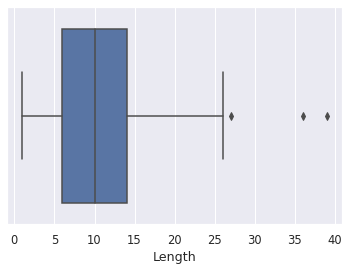

In [12]:
sns.boxplot(x=X_second['Length'])

In [13]:
import statistics
# Standardization
# effects of standardizing data:
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py
scaler = preprocessing.StandardScaler().fit(X_second)
X_scaled = scaler.transform(X_second)
X_scaled = pd.DataFrame(X_scaled, index=X_second.index, columns=X_second.columns)
X = X_scaled

print(X.mean(axis=0))
print(X.std(axis=0))

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

PointsAjust    1.110223e-17
Adjustment     6.106227e-17
Length         1.221245e-16
ManagerExp    -1.623701e-16
TeamExp        4.996004e-17
Language      -3.608225e-16
dtype: float64
PointsAjust    1.006309
Adjustment     1.006309
Length         1.006309
ManagerExp     1.006309
TeamExp        1.006309
Language       1.006309
dtype: float64


,VIF Factor,features
0,2.6,PointsAjust
1,1.6,Adjustment
2,2.0,Length
3,1.4,ManagerExp
4,1.4,TeamExp
5,1.1,Language


# KFold

In [18]:
# import random

# print(random.randint(0, 10000))
      
kf = KFold(n_splits=10)
kf



# # change it to repeated k-fold
lq_scores_absolute = []
lq_scores_squared = []
lq_scores_r = []


for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X.iloc[train], X.iloc[test], Y.iloc[train], Y.iloc[test]

    reg = linear_model.LinearRegression()
    reg.fit(X_train, Y_train)
#     print(reg.coef_)
#     print(reg.intercept_)
    
    Y_pred = reg.predict(X_test)

    lq_scores_absolute.append(metrics.mean_absolute_error(Y_test, Y_pred))
    lq_scores_squared.append(metrics.mean_squared_error(Y_test, Y_pred))
    lq_scores_r.append(metrics.r2_score(Y_test, Y_pred))



    
print(np.mean(lq_scores_absolute))
print(lq_scores_r)
print(np.mean(lq_scores_r))



1783.07859753519
[0.007516145979292954, 0.5807467855606467, 0.4668378662087942, -1.8908724549672402, 0.8156358783294657, 0.715359063338636, 0.532793377314751, -4.189551860205678, 0.6849219679300973, 0.856553001547627]
-0.14200602289636083


### Least Squares

In [19]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(X)

pred = []


for train, test in loo.split(X):
    X_train, X_test, Y_train, Y_test = X.iloc[train], X.iloc[test], Y.iloc[train], Y.iloc[test]

    reg = linear_model.LinearRegression()
    reg.fit(X_train, Y_train)
    
    Y_pred = reg.predict(X_test)
    pred.append(Y_pred[0][0])


print(metrics.r2_score(Y, pred))

0.7140443651309005


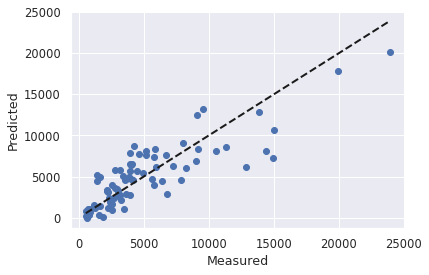

In [20]:
fig, ax = plt.subplots()
ax.scatter(Y, pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

,PointsAjust,Adjustment,Length,ManagerExp,TeamExp,Language
0,0.099317,0.596702,0.087668,0.909511,-0.839198,-0.781044
1,0.171548,0.502175,-1.057384,-1.536232,-1.545891,-0.781044
2,-1.117491,-0.915731,-1.486778,0.909511,1.280881,-0.781044
3,0.104873,0.218594,-0.914252,-1.536232,-1.545891,-0.781044
4,-0.422966,-0.348569,-1.057384,-1.536232,-1.545891,-0.781044
5,-0.511865,0.974810,-1.057384,-1.536232,-1.545891,-0.781044
6,-0.773007,-0.254041,-0.341726,-0.924796,-0.132505,0.672061
7,-0.389629,-0.254041,0.230800,-0.313361,-0.839198,-0.781044
8,-0.206274,0.218594,0.087668,-0.924796,0.574188,-0.781044
9,-1.006367,-0.348569,-1.057384,0.909511,0.574188,-0.781044


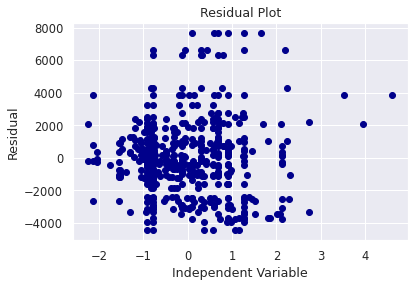

In [21]:

residuals = Y.values.ravel()-pred

plt.plot(X,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")
X

### Ridge Regression

In [22]:
np.logspace(-10, 10, 100)

array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876128e-07, 6.89261210e-07,
       1.09749877e-06, 1.74752840e-06, 2.78255940e-06, 4.43062146e-06,
       7.05480231e-06, 1.12332403e-05, 1.78864953e-05, 2.84803587e-05,
       4.53487851e-05, 7.22080902e-05, 1.14975700e-04, 1.83073828e-04,
       2.91505306e-04, 4.64158883e-04, 7.39072203e-04, 1.17681195e-03,
       1.87381742e-03, 2.98364724e-03, 4.75081016e-03, 7.56463328e-03,
       1.20450354e-02, 1.91791026e-02, 3.05385551e-02, 4.86260158e-02,
       7.74263683e-02, 1.23284674e-01, 1.96304065e-01, 3.12571585e-01,
       4.97702356e-01, 7.92482898e-01, 1.26185688e+00, 2.00923300e+00,
       3.19926714e+00, 5.09413801e+00, 8.11130831e+00, 1.29154967e+01,
      

In [23]:
# import random

# print(random.randint(0, 10000))
      
kf = KFold(n_splits=10)
kf


# # change it to repeated k-fold
lq_scores_absolute = []
lq_scores_squared = []
lq_scores_r = []


for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X.iloc[train], X.iloc[test], Y.iloc[train], Y.iloc[test]

    reg = linear_model.Ridge(alpha=59)
    reg.fit(X_train, Y_train)
#     print(reg.coef_)
#     print(reg.intercept_)
    
    Y_pred = reg.predict(X_test)

    lq_scores_absolute.append(metrics.mean_absolute_error(Y_test, Y_pred))
    lq_scores_squared.append(metrics.mean_squared_error(Y_test, Y_pred))
    lq_scores_r.append(metrics.r2_score(Y_test, Y_pred))



    
print(np.mean(lq_scores_absolute))
print(lq_scores_r)
print(np.mean(lq_scores_r))


1917.968375526179
[0.45751353446099907, 0.5896034578327538, 0.43242641477160504, -1.2468337123174282, 0.6108846648521863, 0.5162243080108445, 0.42646004533241866, -1.9306277041442503, 0.7530145237821197, 0.6745323003356716]
0.12831978329169202


In [24]:
from sklearn.linear_model import RidgeCV


c_l = np.logspace(-100, 0, 100)

clf = RidgeCV(c_l,scoring='r2', store_cv_values=True).fit(X, Y)

print(clf.alpha_)
# print(clf.best_score_)
# print(clf.cv_values_ )
print(clf.score(X, Y))
print(metrics.r2_score(Y, clf.predict(X)))
# plot R2 vs Alpha
print(clf.cv_values_.shape)

1.0
0.7660656363541547
0.7660656363541547
(80, 1, 100)


No handles with labels found to put in legend.


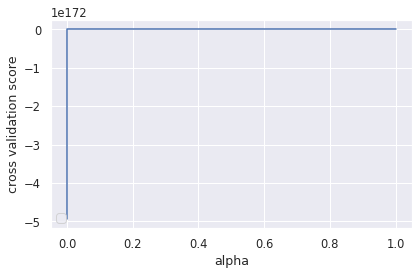

In [25]:
import matplotlib.ticker as tick

alphas = []
scores = []
for x in c_l:
    clf = None
    clf = RidgeCV(alphas=[x],scoring='r2').fit(X, Y)
    alphas.append(clf.alpha_)
    scores.append(clf.score(X, Y))


    
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()


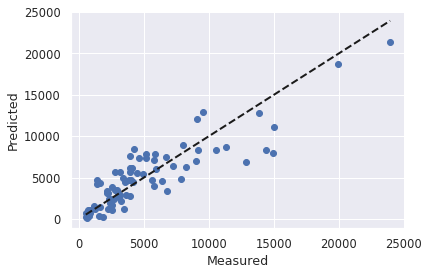

In [26]:
fig, ax = plt.subplots()
ax.scatter(Y, clf.predict(X))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Lasso Regression

In [27]:
# import random

# print(random.randint(0, 10000))
      
kf = KFold(n_splits=10)
kf

# # change it to repeated k-fold
lq_scores_absolute = []
lq_scores_squared = []
lq_scores_r = []


for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X.iloc[train], X.iloc[test], Y.iloc[train], Y.iloc[test]

    reg = linear_model.Lasso(alpha=59)
    reg.fit(X_train, Y_train)
#     print(reg.coef_)
#     print(reg.intercept_)
    
    Y_pred = reg.predict(X_test)

    lq_scores_absolute.append(metrics.mean_absolute_error(Y_test, Y_pred))
    lq_scores_squared.append(metrics.mean_squared_error(Y_test, Y_pred))
    lq_scores_r.append(metrics.r2_score(Y_test, Y_pred))



    
print(np.mean(lq_scores_absolute))
print(lq_scores_r)
print(np.mean(lq_scores_r))


1792.1496579306277
[0.21181645728095877, 0.574399517990021, 0.4856865677612454, -2.023664451232246, 0.8057645820229379, 0.6819556409198158, 0.5078535004650033, -3.4238320563173428, 0.6952920234495458, 0.8476164714754286]
-0.0637111746184632


In [28]:
from sklearn.linear_model import LassoCV
pred = []
clf = LassoCV(cv=5).fit(X, Y.values.ravel())
pred = clf.predict(X)
print(clf.alpha_)
print(clf.coef_)
print(clf.score(X, Y))
# plot R2 vs Alpha

7.9572355572422
[2142.86901003  354.63440476 1658.42257616  520.32152941 -614.41544591
 -979.89277194]
0.7661080590120143


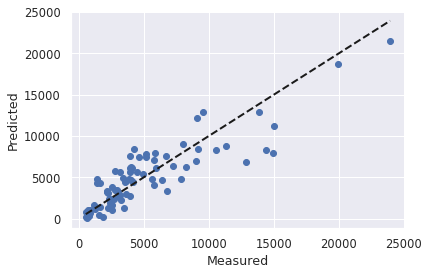

In [29]:
fig, ax = plt.subplots()
ax.scatter(Y, pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Text(0, 0.5, 'Residual')

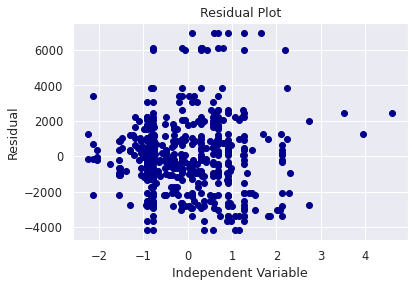

In [30]:

residuals = Y.values.ravel()-pred

plt.plot(X,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")


### Principle Component Regression

In [31]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

comp_nums = [1]
comp_scores = [0.4898304518442006]

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

# print(pca.components_)
print(pca.explained_variance_ratio_)

# principalDf = pd.DataFrame(data = principalComponents)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3' ])

finalDf = pd.concat([principalDf, Y], axis = 1)

print('least squares')
loo = LeaveOneOut()
loo.get_n_splits(principalDf)

pred = []

for train, test in loo.split(principalDf):
    X_train, X_test, Y_train, Y_test = principalDf.iloc[train], principalDf.iloc[test], Y.iloc[train], Y.iloc[test]

    reg = linear_model.LinearRegression()
    reg.fit(X_train, Y_train)
    
    Y_pred = reg.predict(X_test)
    pred.append(Y_pred[0][0])


metric_score = metrics.r2_score(Y, pred)
print(metric_score)
comp_nums.append(3)
comp_scores.append(metric_score)


[0.37466283 0.22685924 0.16732067]
least squares
0.6415084694900706


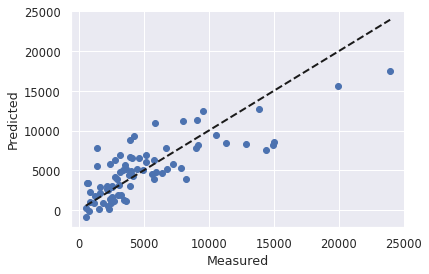

In [32]:
fig, ax = plt.subplots()
ax.scatter(Y, pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

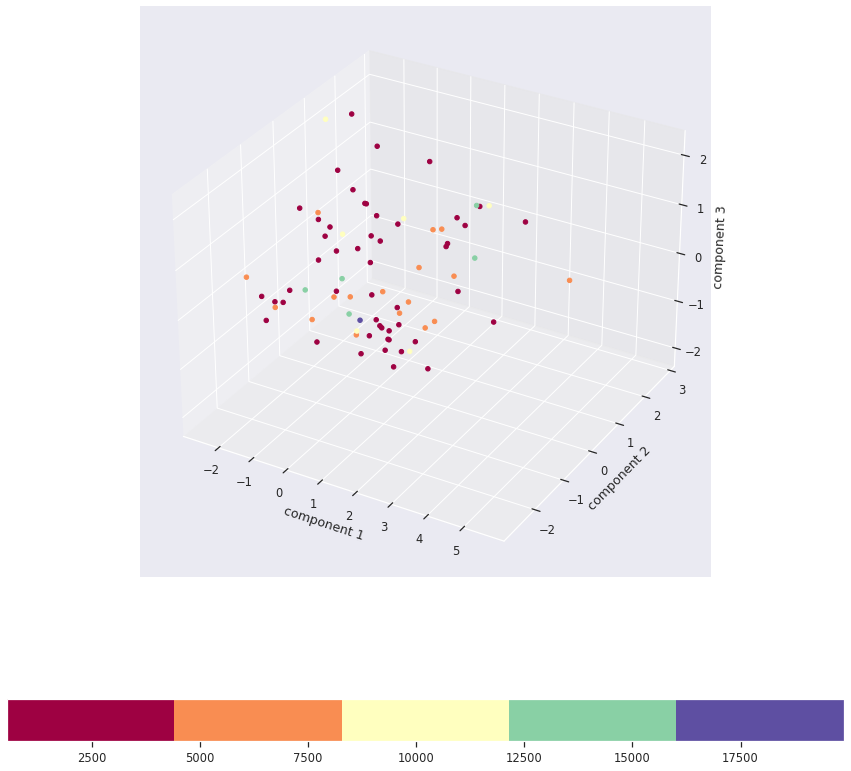

In [33]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax = fig.add_subplot(111, projection='3d')
c = ax.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],
            c=finalDf['Effort'], alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 5))
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')


fig.colorbar(c, ax=ax, orientation='horizontal')
# ax.colorbar();

In [36]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# print(pca.components_)
print(pca.explained_variance_ratio_)

# principalDf = pd.DataFrame(data = principalComponents)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, Y], axis = 1)

loo = LeaveOneOut()
loo.get_n_splits(principalDf)

pred = []

for train, test in loo.split(principalDf):
    X_train, X_test, Y_train, Y_test = principalDf.iloc[train], principalDf.iloc[test], Y.iloc[train], Y.iloc[test]

    reg = linear_model.LinearRegression()
    reg.fit(X_train, Y_train)
    
    Y_pred = reg.predict(X_test)
    pred.append(Y_pred[0][0])


metric_score = metrics.r2_score(Y, pred)
print(metric_score)
comp_nums.append(2)
comp_scores.append(metric_score)


[0.37466283 0.22685924]
0.6142577793202975


ValueError: 'c' argument has 81 elements, which is inconsistent with 'x' and 'y' with size 80.

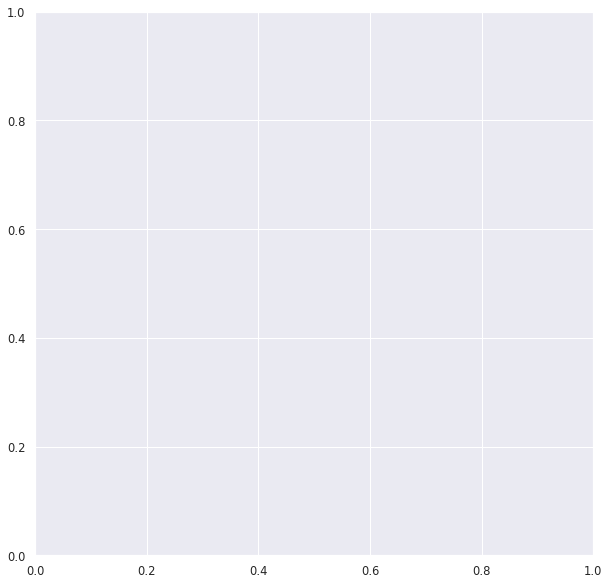

In [37]:

plt.figure(figsize=(10, 10))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
            c=finalDf['Effort'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 5))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [38]:

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)

# print(pca.components_)
print(pca.explained_variance_ratio_)

principalDf = pd.DataFrame(data = principalComponents)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, Y], axis = 1)

loo = LeaveOneOut()
loo.get_n_splits(principalDf)

pred = []

for train, test in loo.split(principalDf):
    X_train, X_test, Y_train, Y_test = principalDf.iloc[train], principalDf.iloc[test], Y.iloc[train], Y.iloc[test]

    reg = linear_model.LinearRegression()
    reg.fit(X_train, Y_train)
    
    Y_pred = reg.predict(X_test)
    pred.append(Y_pred[0][0])


metric_score = metrics.r2_score(Y, pred)
print(metric_score)
comp_nums.append(5)
comp_scores.append(metric_score)

[0.37466283 0.22685924 0.16732067 0.12193414 0.07065298]
0.7154751052790884


In [ ]:

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)

# print(pca.components_)
print(pca.explained_variance_ratio_)

principalDf = pd.DataFrame(data = principalComponents)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, Y], axis = 1)

loo = LeaveOneOut()
loo.get_n_splits(principalDf)

pred = []

for train, test in loo.split(principalDf):
    X_train, X_test, Y_train, Y_test = principalDf.iloc[train], principalDf.iloc[test], Y.iloc[train], Y.iloc[test]

    reg = linear_model.LinearRegression()
    reg.fit(X_train, Y_train)
    
    Y_pred = reg.predict(X_test)
    pred.append(Y_pred[0][0])


metric_score = metrics.r2_score(Y, pred)
print(metric_score)
comp_nums.append(6)
comp_scores.append(metric_score)

In [39]:

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)

# print(pca.components_)
print(pca.explained_variance_ratio_)

principalDf = pd.DataFrame(data = principalComponents)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, Y], axis = 1)

loo = LeaveOneOut()
loo.get_n_splits(principalDf)

pred = []

for train, test in loo.split(principalDf):
    X_train, X_test, Y_train, Y_test = principalDf.iloc[train], principalDf.iloc[test], Y.iloc[train], Y.iloc[test]

    reg = linear_model.LinearRegression()
    reg.fit(X_train, Y_train)
    
    Y_pred = reg.predict(X_test)
    pred.append(Y_pred[0][0])


metric_score = metrics.r2_score(Y, pred)
print(metric_score)
comp_nums.append(4)
comp_scores.append(metric_score)

[0.37466283 0.22685924 0.16732067 0.12193414]
0.7166556524047711


<BarContainer object of 6 artists>

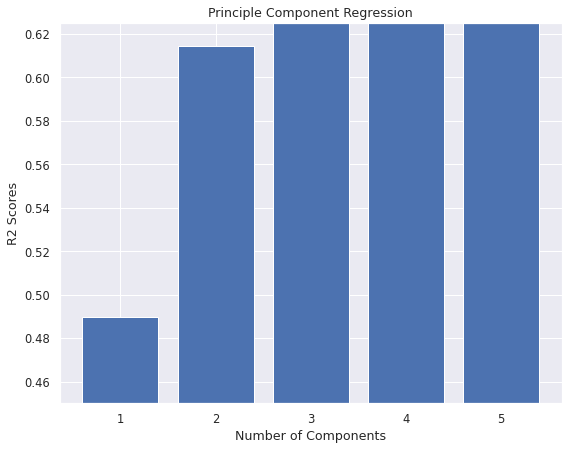

In [42]:
import math

fig = plt.figure()
ax = fig.add_subplot()

ax.set(xlabel='Number of Components', ylabel='R2 Scores',
       title='Principle Component Regression')

fig.set_figheight(7)
fig.set_figwidth(9)


ax.set_ylim([0.45, 0.625])

ax.bar(comp_nums, comp_scores)
  

